# Python: Simple Panel Data Example

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression

from doubleml.data import DoubleMLPanelData
from doubleml.did import DoubleMLDIDMulti

In [6]:
import pandas as pd
import numpy as np
dta = pd.read_csv("https://raw.githubusercontent.com/d2cml-ai/csdid/main/data/sim_data.csv")
dta.head()
# set dtype for G to float
dta["G"] = dta["G"].astype(float)
dta.loc[dta["G"] == 0, "G"] = np.inf

In [7]:
dml_data = DoubleMLPanelData(dta, y_col="Y", d_cols="G", id_col="id", t_col="period", x_cols=["X"])

In [8]:
control_group = "not_yet_treated"
control_group = "never_treated"

ml_g=LinearRegression()
ml_m=LogisticRegression()

# ml_g = LGBMRegressor()
# ml_m = LGBMClassifier()

dml_obj = DoubleMLDIDMulti(
    obj_dml_data=dml_data,
    ml_g=ml_g,
    ml_m=ml_m,
    gt_combinations="standard",
    control_group=control_group,
)

dml_obj.fit()
dml_obj.summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
"ATT(2.0,1,2)",0.922607,0.064144,14.383278,0.000000,0.796886,1.048328
"ATT(2.0,1,3)",1.990200,0.064701,30.760062,0.000000,1.863388,2.117011
"ATT(2.0,1,4)",2.955379,0.063298,46.689908,0.000000,2.831317,3.079441
"ATT(3.0,1,2)",-0.041535,0.065788,-0.631352,0.527810,-0.170477,0.087406
"ATT(3.0,2,3)",1.107889,0.065385,16.944147,0.000000,0.979737,1.236041
"ATT(3.0,2,4)",2.060141,0.065261,31.567865,0.000000,1.932232,2.188049
"ATT(4.0,1,2)",0.001911,0.068411,0.027932,0.977716,-0.132171,0.135993
"ATT(4.0,2,3)",0.058708,0.066517,0.882598,0.377454,-0.071663,0.189079
"ATT(4.0,3,4)",0.949944,0.067551,14.062713,0.000000,0.817547,1.082340


/home/ubuntu/.venv/lib/python3.12/site-packages/doubleml/did/did_multi.py:1298: UserWarning: Joint confidence intervals require bootstrapping which hasn't been performed yet. Automatically applying '.bootstrap(method="normal", n_rep_boot=500)' with default values. For different bootstrap settings, call bootstrap() explicitly before plotting.
  warnings.warn(
/home/ubuntu/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/ubuntu/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


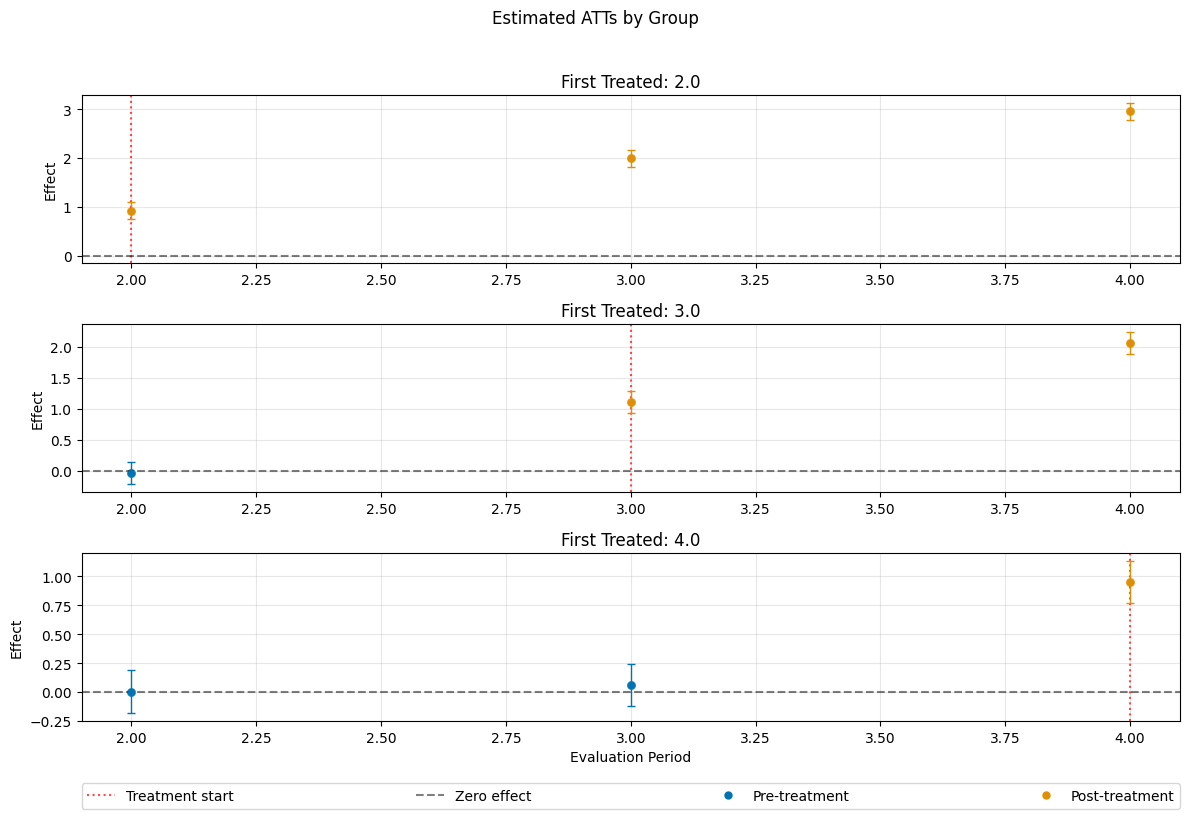

In [9]:
fig, ax = dml_obj.plot_effects()

In [10]:
level = 0.95

ci = dml_obj.confint(level=level)
dml_obj.bootstrap(n_rep_boot=5000)
ci_joint = dml_obj.confint(level=level, joint=True)

In [11]:
print(dml_obj)

================== DoubleMLDIDMulti Object ==================

------------------ Data summary      ------------------
Outcome variable: Y
Treatment variable(s): ['G']
Covariates: ['X']
Instrument variable(s): None
Time variable: period
Id variable: id
No. Observations: 3979

------------------ Score & algorithm ------------------
Score function: observational
Control group: never_treated
Anticipation periods: 0

------------------ Machine learner   ------------------
Learner ml_g: LinearRegression()
Learner ml_m: LogisticRegression()
Out-of-sample Performance:
Regression:
Learner ml_g0 RMSE: [[1.428271   1.40887549 1.40168244 1.42532747 1.4039708  1.41869578
  1.42626481 1.40583671 1.422799  ]]
Learner ml_g1 RMSE: [[1.4041563  1.43664137 1.39962992 1.41564601 1.42921804 1.38423683
  1.45633209 1.41489659 1.40683575]]
Classification:
Learner ml_m Log Loss: [[0.69055048 0.69162981 0.69073153 0.67993783 0.67912701 0.67981987
  0.66247836 0.6630701  0.66225537]]

------------------ Resamp

================== DoubleMLDIDAggregation Object ==================
 Group Aggregation 

------------------ Overall Aggregated Effects ------------------
    coef  std err         t  P>|t|    2.5 %   97.5 %
1.487887 0.034226 43.472843    0.0 1.420805 1.554968
------------------ Aggregated Effects         ------------------
         coef   std err          t  P>|t|     2.5 %    97.5 %
2.0  1.956062  0.052292  37.406316    0.0  1.853571  2.058553
3.0  1.584015  0.056203  28.183929    0.0  1.473859  1.694170
4.0  0.949944  0.067551  14.062713    0.0  0.817547  1.082340
------------------ Additional Information     ------------------
Control Group: never_treated
Anticipation Periods: 0
Score: observational



/home/ubuntu/.venv/lib/python3.12/site-packages/doubleml/did/did_aggregation.py:328: UserWarning: Joint confidence intervals require bootstrapping which hasn't been performed yet. Automatically applying '.aggregated_frameworks.bootstrap(method="normal", n_rep_boot=500)' with default values. For different bootstrap settings, call bootstrap() explicitly before plotting.
  warnings.warn(


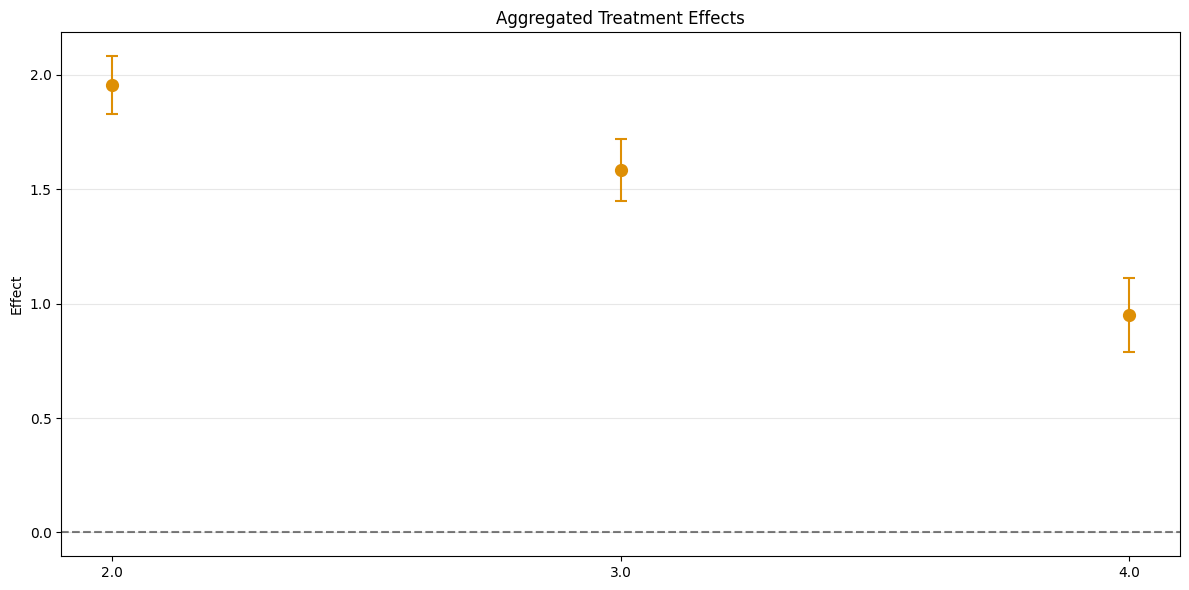

In [12]:
aggregated = dml_obj.aggregate("group")
print(aggregated)
fig, ax = aggregated.plot_effects()

================== DoubleMLDIDAggregation Object ==================
 Time Aggregation 

------------------ Overall Aggregated Effects ------------------
    coef  std err         t  P>|t|    2.5 %   97.5 %
1.481664 0.035122 42.186396    0.0 1.412826 1.550501
------------------ Aggregated Effects         ------------------
       coef   std err          t  P>|t|     2.5 %    97.5 %
2  0.922607  0.064144  14.383278    0.0  0.796886  1.048328
3  1.550398  0.051377  30.177088    0.0  1.449701  1.651094
4  1.971986  0.046573  42.341923    0.0  1.880705  2.063267
------------------ Additional Information     ------------------
Control Group: never_treated
Anticipation Periods: 0
Score: observational



/home/ubuntu/.venv/lib/python3.12/site-packages/doubleml/did/did_aggregation.py:328: UserWarning: Joint confidence intervals require bootstrapping which hasn't been performed yet. Automatically applying '.aggregated_frameworks.bootstrap(method="normal", n_rep_boot=500)' with default values. For different bootstrap settings, call bootstrap() explicitly before plotting.
  warnings.warn(


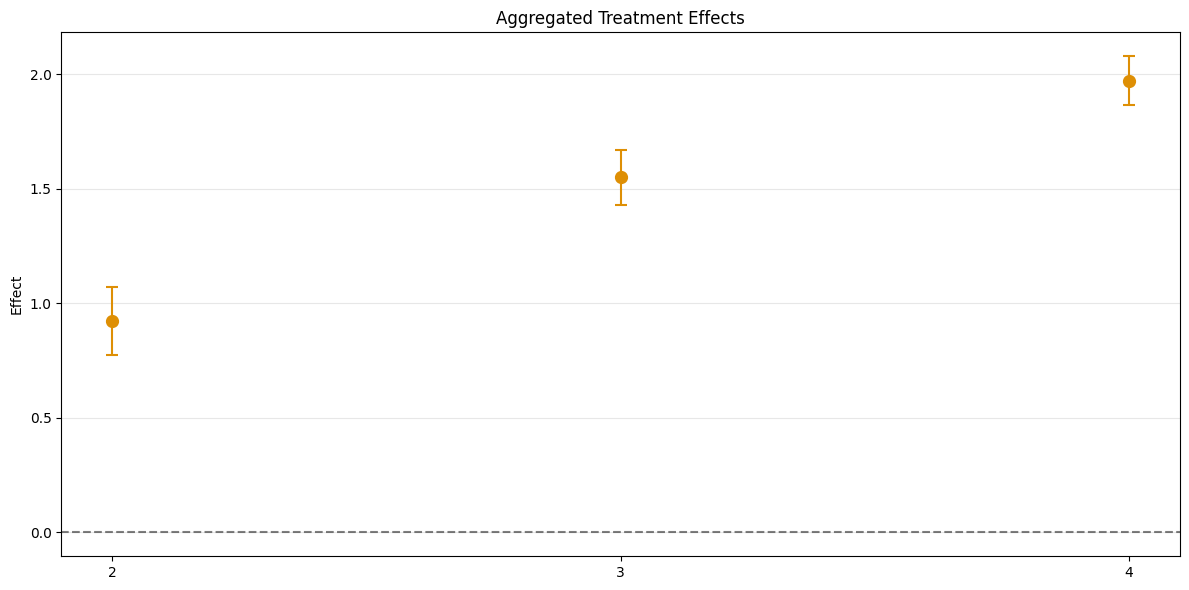

In [13]:
aggregated_time = dml_obj.aggregate("time")
print(aggregated_time)
fig, ax = aggregated_time.plot_effects()

================== DoubleMLDIDAggregation Object ==================
 Event Study Aggregation 

------------------ Overall Aggregated Effects ------------------
    coef  std err         t  P>|t|    2.5 %   97.5 %
1.991002 0.038754 51.376042    0.0 1.915046 2.066957
------------------ Aggregated Effects         ------------------
          coef   std err          t     P>|t|     2.5 %    97.5 %
-2.0  0.001911  0.068411   0.027932  0.977716 -0.132171  0.135993
-1.0  0.009913  0.040508   0.244708  0.806682 -0.069481  0.089306
0.0   0.992564  0.030753  32.274917  0.000000  0.932289  1.052840
1.0   2.025063  0.045671  44.340590  0.000000  1.935550  2.114576
2.0   2.955379  0.063298  46.689908  0.000000  2.831317  3.079441
------------------ Additional Information     ------------------
Control Group: never_treated
Anticipation Periods: 0
Score: observational



/home/ubuntu/.venv/lib/python3.12/site-packages/doubleml/did/did_aggregation.py:328: UserWarning: Joint confidence intervals require bootstrapping which hasn't been performed yet. Automatically applying '.aggregated_frameworks.bootstrap(method="normal", n_rep_boot=500)' with default values. For different bootstrap settings, call bootstrap() explicitly before plotting.
  warnings.warn(


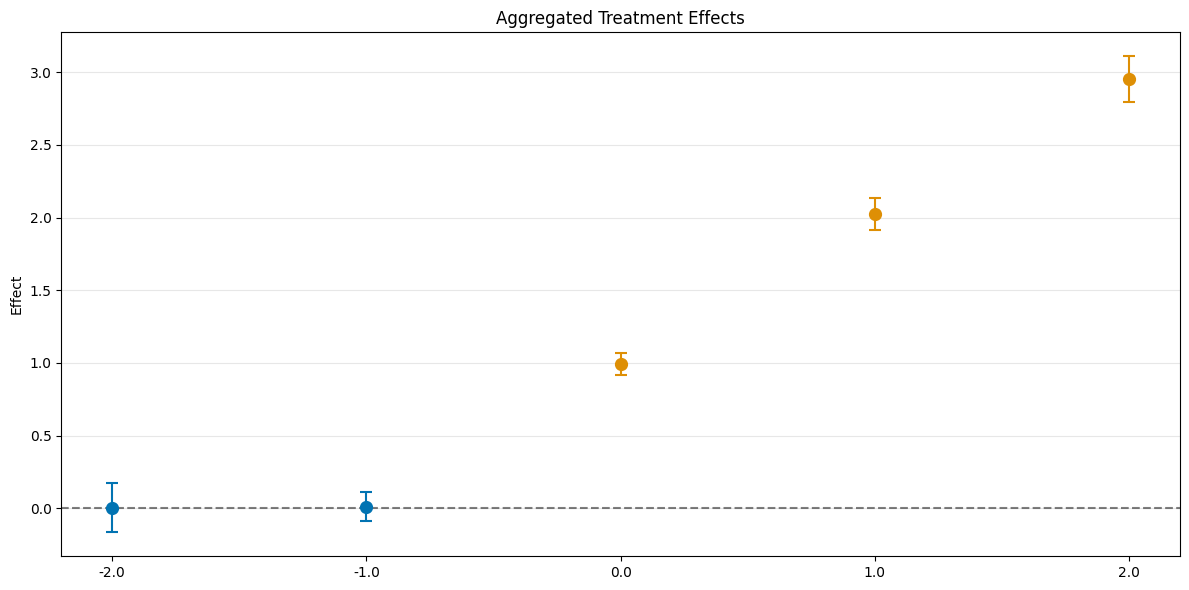

In [14]:
aggregated_eventstudy = dml_obj.aggregate("eventstudy")
print(aggregated_eventstudy)
fig, ax = aggregated_eventstudy.plot_effects()